In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans  # класс к-средних из sklearn

In [3]:
Y_ar = np.array([3, 4, 6, 8, 2, 11, 1])
X_ar = np.array([-3, 1, 2, 3, 5, 6, 7])

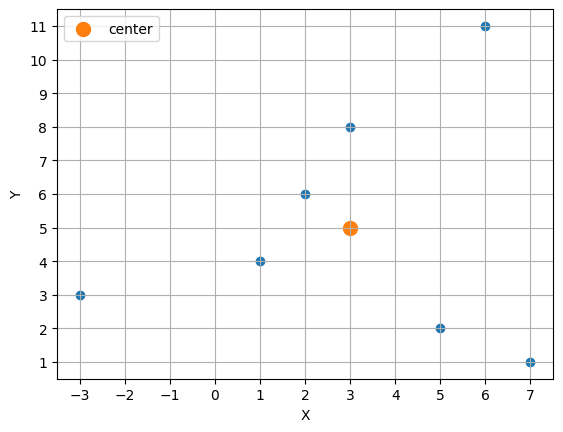

In [4]:
# Рассмотрим произвольный кластер
# Введем понятие центроида как геом. центр рассматриваемых наблюдений
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks(np.arange(min(X_ar), max(X_ar) +1, 1.0)) 
plt.yticks(np.arange(min(Y_ar), max(Y_ar) +1, 1.0)) 
plt.scatter(X_ar, Y_ar)
plt.scatter(X_ar.mean(), Y_ar.mean(), s=100, label = 'center')
plt.grid()
plt.legend(loc = 'upper left');

In [5]:
# квадраты отклонений два 2D
def distance(center, point):
    return (center[0] - point[0])**2 + (center[1] - point[1])**2

In [6]:
# Внутрикластерная сумма квадратов (intracluster sum of squares) - сумма квадра-
# тов отклонений каждого наблюдения от центроида кластера
center = (X_ar.mean(), Y_ar.mean())
ds = [distance(center, i) for i in zip(X_ar, Y_ar)]
print(np.sum(ds))

146.0


In [7]:
data1 = pd.read_csv('iris.csv')
data1 = data1.rename(columns={'sepal length': 'sepal_length', 'sepal width': 'sepal_width'})

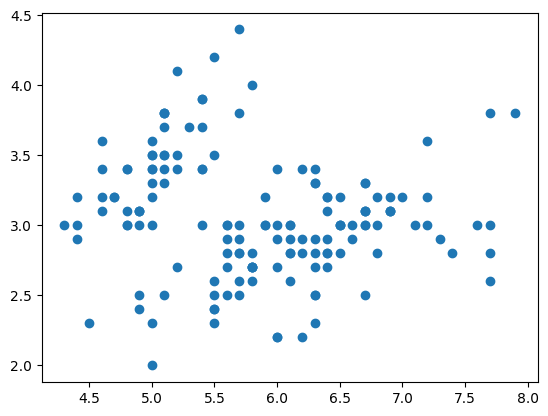

In [8]:
data3 = np.array([i for i in zip(data1.sepal_length, data1.sepal_width)]) # или np.vstack
plt.scatter(data3[:, 0], data3[:, 1]);

c:\Users\MateBook D16\Desktop\Александр\Python\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\MateBook D16\Desktop\Александр\Python\myenv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


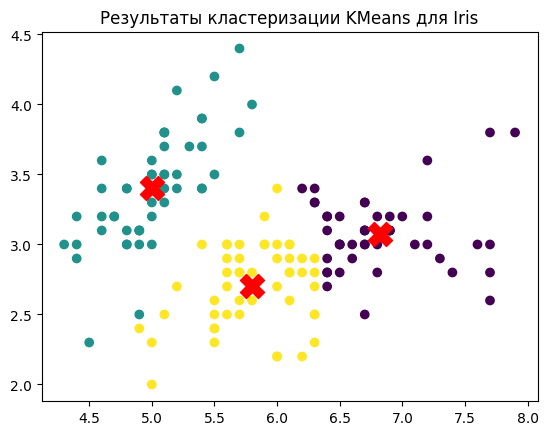

In [9]:
# Кластерный анализ. Метод k-means.
kmeans = KMeans(n_clusters=3)  # задается число кластеров и параметр для воспроизводимости результатов
kmeans.fit(data3)
# Получение меток кластеров  
labels = kmeans.labels_  # то, какое наблюдение к чему относится
# Визуализация результатов кластеризации  
plt.scatter(data3[:, 0], data3[:, 1], c=labels, cmap='viridis')  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')  
plt.title('Результаты кластеризации KMeans для Iris')  
plt.show()  

In [10]:
# Оценка числа кластеров
# Оптимальное число там, где следующая сумма внутр. расстояния будем слабо изменяться
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k) # создаем класс с атрибутом класса n_clusters
    kmeans.fit(data3)
    inertia.append(kmeans.inertia_) # вызываем атрибут inertia_ - внутрикластерная дисперсия.

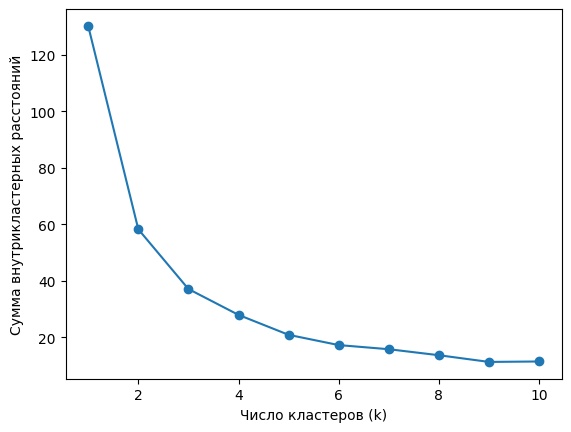

3 кластера является оптимальным числом центроидов


In [11]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Число кластеров (k)")
plt.ylabel("Сумма внутрикластерных расстояний")
plt.show()
print('3 кластера является оптимальным числом центроидов')

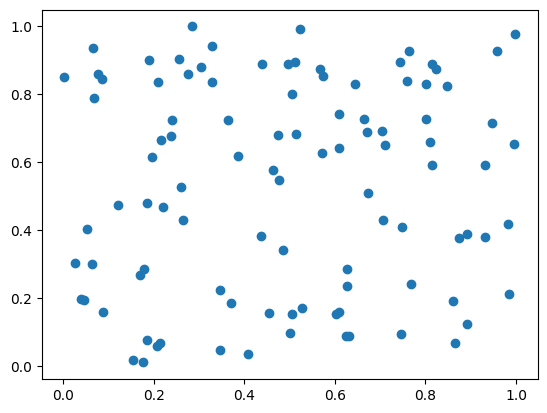

In [140]:
# Равномерное распределение
data = np.array([np.random.random(2) for _ in range(100)])
plt.scatter(data[:, 0], data[:, 1]);

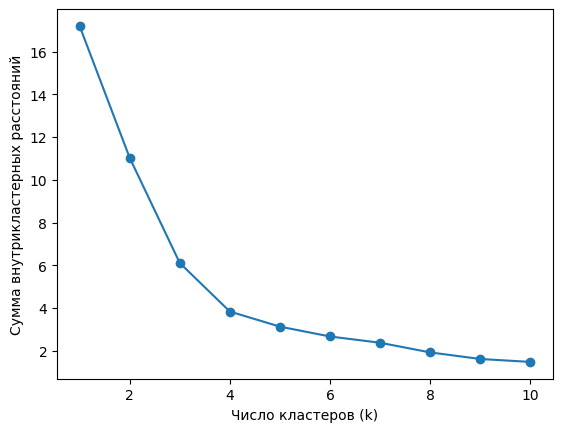

Монотонная кривая, нет вырожденных кластеров


In [142]:
# Оценка числа кластеров
# Оптимальное число там, где следующая сумма внутр. расстояния будем слабо изменяться
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k) # создаем класс с атрибутом класса n_clusters
    kmeans.fit(data)
    inertia.append(kmeans.inertia_) # вызываем атрибут inertia_ - внутрикластерная дисперсия.

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel("Число кластеров (k)")
plt.ylabel("Сумма внутрикластерных расстояний")
plt.show()
print('Монотонная кривая, нет вырожденных кластеров')